4. Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.
Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [3]:
data = pd.read_csv('admission.csv')
data.columns = data.columns.str.strip()
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [5]:
# Convert 'Chance of Admit' into a binary classification target (1 = Admitted, 0 = Not Admitted)
data['Admit'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)

In [6]:
# Select features (excluding 'Serial No.')
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = data['Admit']


In [7]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Train the Classification Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [9]:
#Make Predictions
y_pred = model.predict(X_test)


In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [11]:
#Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [12]:
# Print Evaluation Metrics
print("\nConfusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[54 10]
 [ 4 32]]
Accuracy: 0.86
Precision: 0.76
Recall: 0.89
F1 Score: 0.82


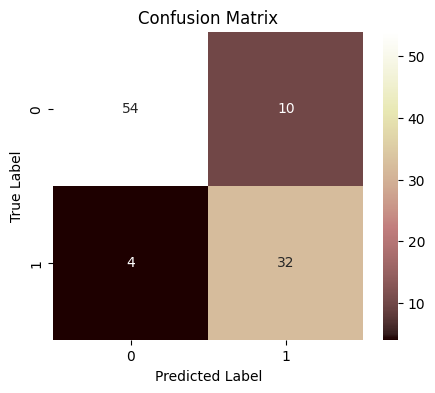

In [13]:
#Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()